<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Treewidth-for-different-sizes" data-toc-modified-id="Treewidth-for-different-sizes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Treewidth for different sizes</a></span></li><li><span><a href="#New-composer" data-toc-modified-id="New-composer-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>New composer</a></span></li><li><span><a href="#New-composer" data-toc-modified-id="New-composer-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>New composer</a></span><ul class="toc-item"><li><span><a href="#Different-seeds" data-toc-modified-id="Different-seeds-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Different seeds</a></span></li></ul></li><li><span><a href="#CLI" data-toc-modified-id="CLI-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>CLI</a></span></li><li><span><a href="#Nbdev-stuff" data-toc-modified-id="Nbdev-stuff-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Nbdev stuff</a></span></li></ul></div>

# Benchmark QAOA Energy circuits 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qtensor_specs.time_vs_flop import ex
from qtensor_specs.time_vs_flop import (
    step_flops
    ,max_mem
    ,step_sim_time
)

from qtensor import toolbox

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
#export

@ex.provider
def qaoa_energy_tws(graph, p, ordering_algo='greedy', composer_type='cone'):
    twidths = toolbox.qaoa_energy_tw_from_graph(graph, p, ordering_algo=ordering_algo, composer_type=composer_type)
    return tuple(twidths)

In [5]:
#export

@ex.provider
def qaoa_energy_max_tws(qaoa_energy_tws):
    return max(qaoa_energy_tws)

@ex.provider
def qaoa_energy_med_tws(qaoa_energy_tws):
    return np.median(qaoa_energy_tws)

@ex.provider
def qaoa_energy_min_tws(qaoa_energy_tws):
    return np.min(qaoa_energy_tws)
    
    

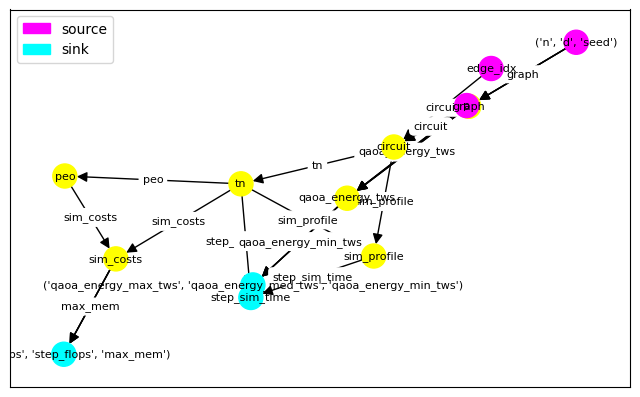

In [6]:
f =  ex.draw_dependency_graph()


## Treewidth for different sizes

In [7]:
_ = ex.get_variable('circuit', n=10, p=2, seed=1, d=3, edge_idx=1)

In [9]:
Ns = 2**np.arange(2, 7)
                    
tws_max, tws_med, tws_min = ex.map_variables(('qaoa_energy_max_tws', 'qaoa_energy_med_tws', 'qaoa_energy_min_tws'),
                    n=Ns, p=[4], seed=[100], d=[3], composer_type=['cylinder']
           )

In [10]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

<ipython-input-11-f9601b14b789>:6: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


Text(0.5, 0, 'Graph size N')

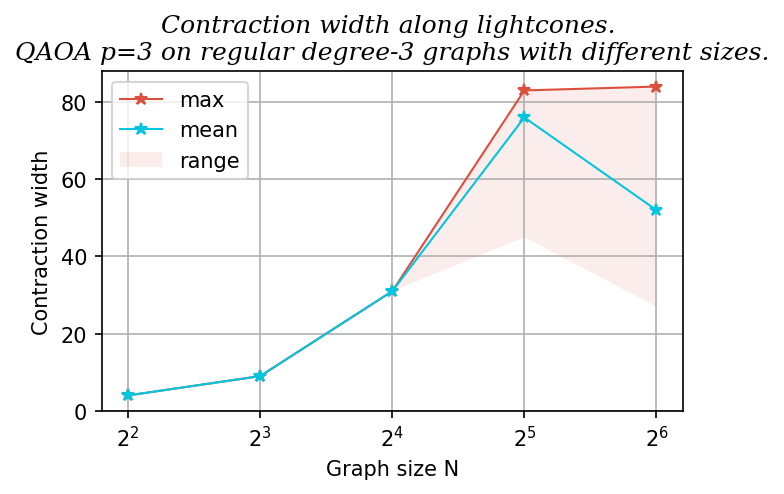

In [11]:
plt.figure(dpi=150, figsize=(5,3))
plt.plot(Ns, tws_max, '*-', linewidth=1, label='max' )
plt.fill_between(Ns, tws_max, tws_min, alpha=.1, label='range')
plt.plot(Ns, tws_med, '*-', linewidth=1, label='mean')
plt.legend()
plt.xscale('log', basex=2)
plt.xticks(Ns)
plt.grid()
plt.title(("Contraction width along lightcones. \n"
              "QAOA p=3 on regular degree-3 graphs with different sizes.")
          ,style='italic'
          ,family='serif'
         )
plt.ylabel('Contraction width')
plt.xlabel('Graph size N')

## New composer

In [24]:
p = 4
Ns = 2*(.5*np.pi**(np.arange(0, 16)/2)).astype(np.int) + 10
                    
tws_max, tws_med, tws_min = ex.map_variables(('qaoa_energy_max_tws', 'qaoa_energy_med_tws', 'qaoa_energy_min_tws'),
                    n=Ns, p=[p], seed=[100], d=[3], composer_type=['cone']
           )

In [27]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('png')

<ipython-input-29-1919bcef1b77>:7: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


Text(0.5, 0, 'Graph size N')

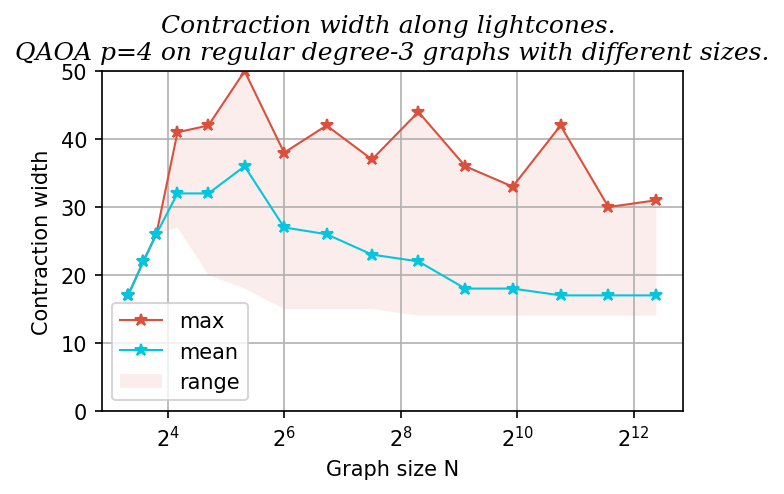

In [29]:
plt.figure(dpi=150, figsize=(5,3))
plt.plot(Ns, tws_max, '*-', linewidth=1, label='max' )
plt.fill_between(Ns, tws_max, tws_min, alpha=.1, label='range')
plt.plot(Ns, tws_med, '*-', linewidth=1, label='mean')
plt.legend()
plt.ylim(0, max(tws_max))
plt.xscale('log', basex=2)
plt.grid()
plt.title(("Contraction width along lightcones. \n"
              f"QAOA p={p} on regular degree-3 graphs with different sizes.")
          ,style='italic'
          ,family='serif'
         )
plt.ylabel('Contraction width')
plt.xlabel('Graph size N')

<ipython-input-139-8f1f3bad9965>:6: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


Text(0.5, 0, 'Graph size N')

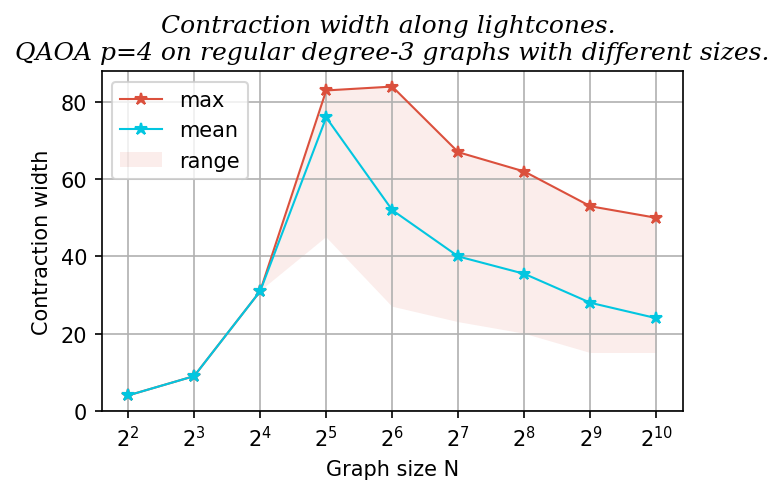

In [139]:
plt.figure(dpi=150, figsize=(5,3))
plt.plot(Ns, tws_max, '*-', linewidth=1, label='max' )
plt.fill_between(Ns, tws_max, tws_min, alpha=.1, label='range')
plt.plot(Ns, tws_med, '*-', linewidth=1, label='mean')
plt.legend()
plt.xscale('log', basex=2)
plt.xticks(Ns)
plt.grid()
plt.title(("Contraction width along lightcones. \n"
              "QAOA p=4 on regular degree-3 graphs with different sizes.")
          ,style='italic'
          ,family='serif'
         )
plt.ylabel('Contraction width')
plt.xlabel('Graph size N')

In [55]:
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(
    color=['#D94430', '#009FF5', '#ca9502', '#116A43', '#4B1B4A']
    
)

In [36]:
tws = ex.map_variables(('qaoa_energy_tws',), n=(128, 256,), composer_type=['old'], seed=[100], p=[3], d=[3])

/home/dali/side-projects-hobby/cartesian_explorer/cartesian_explorer/ExplorerBasic.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  result = np.array(list(tqdm(


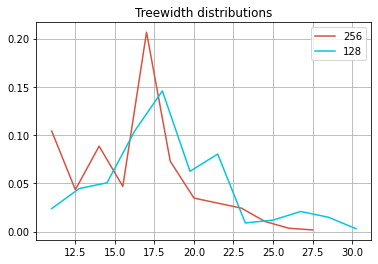

In [37]:
nbins = 12
y, x = np.histogram(tws[0][1], bins=nbins, density=True)
plt.plot(x[:-1],y, label='256',)
y, x = np.histogram(tws[0][0], bins=nbins, density=True)
plt.plot(x[:-1],y, label='128',)

plt.title('Treewidth distributions')
plt.legend()
plt.grid()

## New composer

In [85]:
tws = ex.map_variables(('qaoa_energy_tws',), n=(128, 256, 512, 1024, 2048),
                       composer_type=['new'], seed=[100], p=[5], d=[3])

my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is Qtr

my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is Qtr

my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is Qtr

my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is Qtr

my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is Qtr

my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is Qtr

my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is Qtr

my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is Qtr

my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is Qtr

my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is Qtr

my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is QtreeQAOAComposer
my type is Qtr

/home/dali/side-projects-hobby/cartesian_explorer/cartesian_explorer/ExplorerBasic.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  result = np.array(list(tqdm(


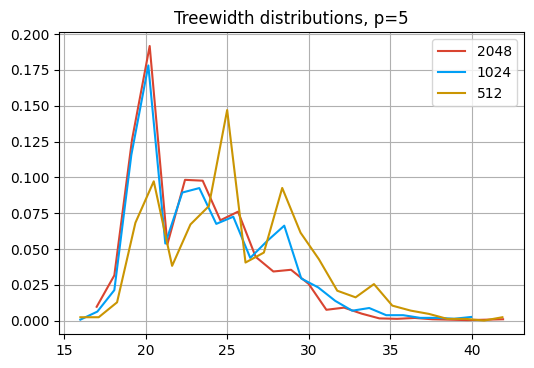

In [86]:
nbins = 24
plt.figure(dpi=100)
y, x = np.histogram(tws[0][4], bins=nbins, density=True)
plt.plot(x[:-1],y, label='2048',)
y, x = np.histogram(tws[0][3], bins=nbins, density=True)
plt.plot(x[:-1],y, label='1024',)
y, x = np.histogram(tws[0][2], bins=nbins, density=True)
plt.plot(x[:-1],y, label='512',)

plt.title('Treewidth distributions, p=5')
plt.legend()
plt.grid()

### Different seeds

In [ ]:
seeds = [100, 101, 102, 103]
tws_vs_seed = []
for seed in seeds:
    tw_ = ex.get_variable('qaoa_energy_tws', n=Ns[13], seed=seed, p=4, d=3)
    tws_vs_seed.append(tw_)
    

In [30]:
nbins = 12
y, x = np.histogram(tws_vs_seed[3], bins=nbins, density=True)
plt.plot(x[:-1],y, label='1024')
y, x = np.histogram(tws_vs_seed[2], bins=nbins, density=True)
plt.plot(x[:-1],y, label='512')
y, x = np.histogram(tws_vs_seed[1], bins=nbins, density=True)
plt.plot(x[:-1],y, label='256',)
y, x = np.histogram(tws_vs_seed[0], bins=nbins, density=True)
plt.plot(x[:-1],y, label='128',)

plt.title('Treewidth distributions')
plt.legend()
plt.grid()

NameError: name 'tws_vs_seed' is not defined

## CLI

In [7]:
#export

from qtensor_specs.time_vs_flop import cli
import click

@click.option('-B', '--backend', default='numpy')
@click.option('-M', '--max-memory', default=3e8)
@click.option('-s', '--seed', default=SEED)
@click.option('-O', '--ordering_algo', default='greedy'
              ,help=("One of (greedy, tamaki, tamaki_{wait_time})"
                     "'tamaki_15' means heuristic solver running for 15 seconds per graph"
                    )
             )
def qaoa_simulate(backend='numpy', seed=108
                  max_memory=1e8,
                  ordering_algo='greedy',
                 ):
    


## Nbdev stuff

In [221]:
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(
    color=['#D94430', '#009FF5', '#ca9502', '#116A43', '#4B1B4A']
    
)

In [ ]:
from nbdev.export  import *
notebook2script()